### untuk run model hanya yang di kasih tulisan ini
## START

In [ ]:
#Library Machine Learning untuk mengelola data dan perhitungan gradien
import torch

In [ ]:
import os #directory
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #menampilkan gambar

In [ ]:
#library untuk YOLOV8
!pip install ultralytics==8.0.196 --quiet
print('done')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.9 MB/s eta 0:00:00
done


# gausah

In [ ]:
# install library roboflow untuk import dataset yang akan digunakan

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="8bj5K7MdW6N10RhnTeJi")
project = rf.workspace("universitas-widya-gama").project("bismillah-skripsi-twcqn")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.


Extracting Dataset Version Zip to Bismillah-Skripsi-1 in yolov8:: 100%|██████████| 3556/3556 [00:00<00:00, 5230.39it/s]


In [ ]:
cat /root/.config/Ultralytics/settings.yaml

settings_version: 0.0.4
datasets_dir: /content/datasets
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true


In [ ]:
#import library yaml untuk membaca file .yaml

import yaml

with open("/root/.config/Ultralytics/settings.yaml", "r") as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)

data["datasets_dir"] = "/content/"

with open("/root/.config/Ultralytics/settings.yaml", "w") as f:
    yaml.dump(data, f)

In [ ]:
cat /root/.config/Ultralytics/settings.yaml

api_key: ''
clearml: true
comet: true
datasets_dir: /content/
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
runs_dir: runs
settings_version: 0.0.4
sync: true
tensorboard: true
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
wandb: true
weights_dir: weights


In [ ]:
cat /content/Bismillah-Skripsi-1/data.yaml

names:
- Umur 2 Bulan
- Umur 3-4 Bulan
- Umur 5-6 Bulan
nc: 3
roboflow:
  license: CC BY 4.0
  project: bismillah-skripsi-twcqn
  url: https://universe.roboflow.com/universitas-widya-gama/bismillah-skripsi-twcqn/dataset/1
  version: 1
  workspace: universitas-widya-gama
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
import yaml

with open("/content/Bismillah-Skripsi-1/data.yaml", "r") as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)

data["train"] = "../train/images"
data["test"] = "../test/images"
data["val"] = "../valid/images"

with open("/content/Bismillah-Skripsi-1/data.yaml", "w") as f:
    yaml.dump(data, f)

In [ ]:
cat/content/Bismillah-Skripsi-1/data.yaml

names:
- Umur 2 Bulan
- Umur 3-4 Bulan
- Umur 5-6 Bulan
nc: 3
roboflow:
  license: CC BY 4.0
  project: bismillah-skripsi-twcqn
  url: https://universe.roboflow.com/universitas-widya-gama/bismillah-skripsi-twcqn/dataset/1
  version: 1
  workspace: universitas-widya-gama
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
!yolo task=detect mode=train amp='False' model=yolov8n.pt imgsz=640 data=/content/Bismillah-Skripsi-1/data.yaml epochs=70 batch=4 lrf=1e-4

100% 6.23M/6.23M [00:00<00:00, 117MB/s]
New https://pypi.org/project/ultralytics/8.0.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Bismillah-Skripsi-1/data.yaml, epochs=70, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

In [ ]:
!zip -r runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels.jpg (deflated 40%)
  adding: content/runs/detect/train/train_batch23280.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 10%)
  adding: content/runs/detect/train/weights/last.pt (deflated 10%)
  adding: content/runs/detect/train/R_curve.png (deflated 17%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train/events.out.tfevents.1703151638.ffb478ab989d.2209.0 (deflated 74%)
  adding: content/runs/detect/t

In [ ]:
os.listdir('/content/runs/detect/train')

['labels.jpg',
 'train_batch23280.jpg',
 'val_batch2_labels.jpg',
 'train_batch2.jpg',
 'val_batch0_labels.jpg',
 'labels_correlogram.jpg',
 'weights',
 'R_curve.png',
 'train_batch0.jpg',
 'events.out.tfevents.1703151638.ffb478ab989d.2209.0',
 'PR_curve.png',
 'train_batch1.jpg',
 'train_batch23281.jpg',
 'confusion_matrix.png',
 'results.csv',
 'P_curve.png',
 'confusion_matrix_normalized.png',
 'F1_curve.png',
 'args.yaml',
 'val_batch2_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch0_pred.jpg',
 'results.png',
 'train_batch23282.jpg',
 'val_batch1_pred.jpg']

In [ ]:
plots = []
for file in os.listdir('/content/runs/detect/train'):
    if file.split('.')[-1] == 'jpg':
        plots.append(file)
plots

['labels.jpg',
 'train_batch23280.jpg',
 'val_batch2_labels.jpg',
 'train_batch2.jpg',
 'val_batch0_labels.jpg',
 'labels_correlogram.jpg',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch23281.jpg',
 'val_batch2_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch0_pred.jpg',
 'train_batch23282.jpg',
 'val_batch1_pred.jpg']

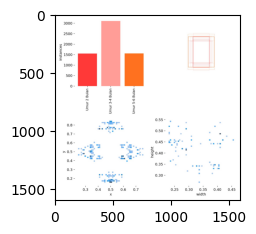

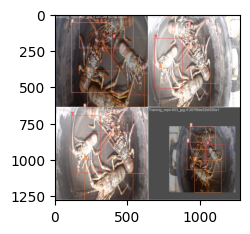

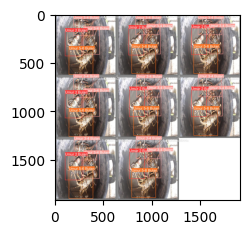

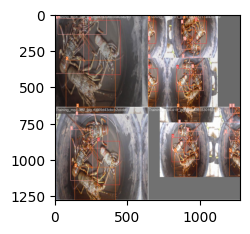

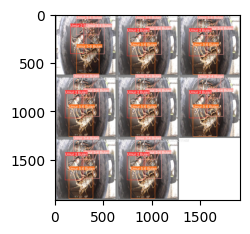

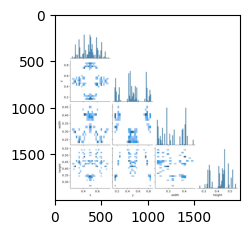

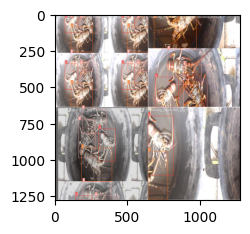

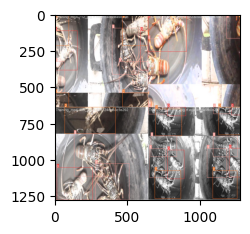

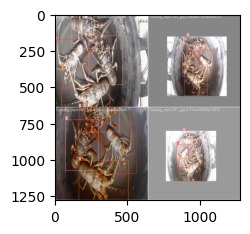

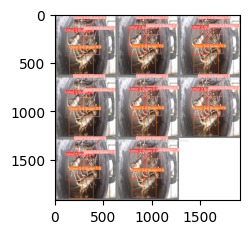

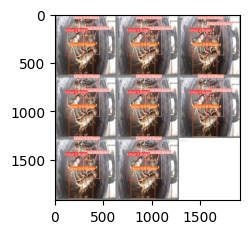

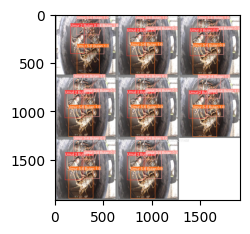

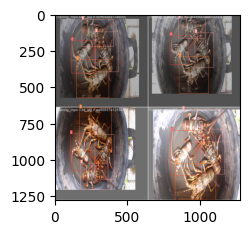

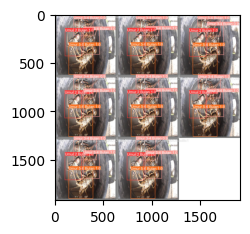

In [ ]:
for idx, plot in enumerate(plots):
    plt.figure(figsize=(40, 40))
    image = mpimg.imread(f'/content/runs/detect/train/{plot}')
    plt.subplot(len(plots), 1, idx+1)
    plt.imshow(image)

In [ ]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source=/content/Bismillah-Skripsi-1/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-116_jpg.rf.1ef2bc197142db28164ca8b2135a7e1d.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 10.6ms
image 2/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-120_jpg.rf.4dbbcf1c456e8369325ac3a6b4cb323f.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 8.2ms
image 3/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-140_jpg.rf.cfad041d9b78b48548f13b81e3a2580c.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 7.7ms
image 4/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-143_jpg.rf.57473c82ec5cd93595d4a57c8188ac41.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 7.4ms
image 5/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-

In [ ]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source=/content/Bismillah-Skripsi-1/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-116_jpg.rf.1ef2bc197142db28164ca8b2135a7e1d.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 10.6ms
image 2/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-120_jpg.rf.4dbbcf1c456e8369325ac3a6b4cb323f.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 8.2ms
image 3/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-140_jpg.rf.cfad041d9b78b48548f13b81e3a2580c.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 7.7ms
image 4/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-143_jpg.rf.57473c82ec5cd93595d4a57c8188ac41.jpg: 640x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 7.4ms
image 5/74 /content/Bismillah-Skripsi-1/test/images/Training_mp4-

In [ ]:
predict_path = 'runs/detect/predict'
predicted_images = os.listdir(predict_path)

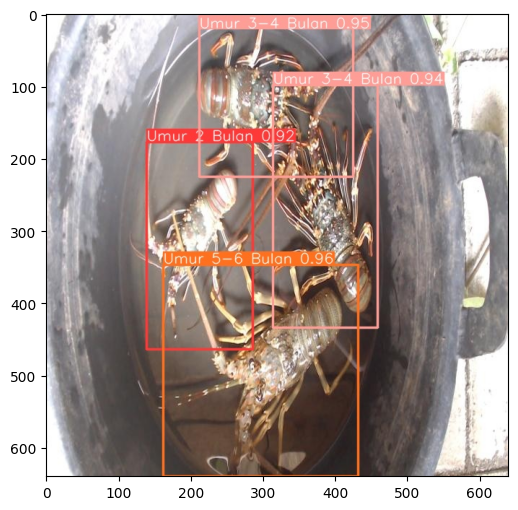

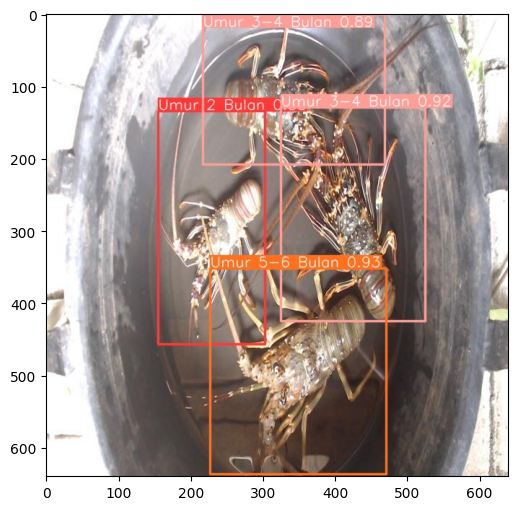

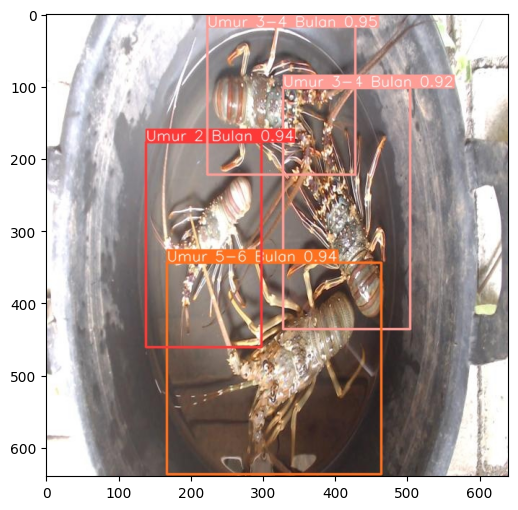

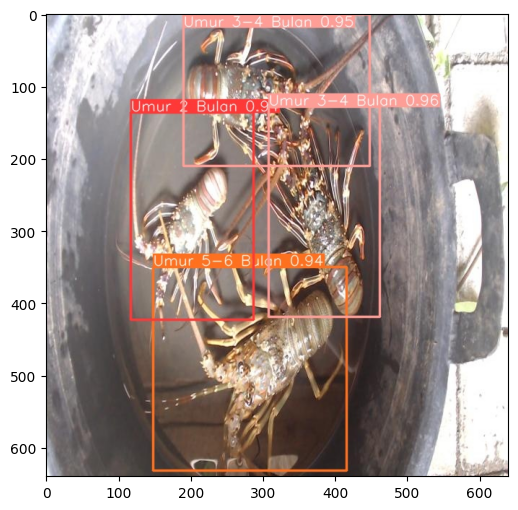

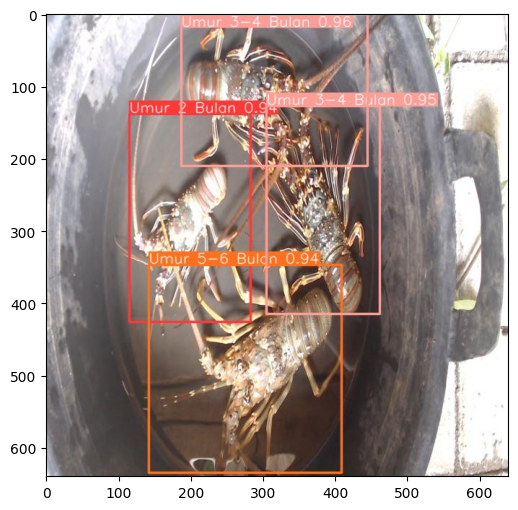

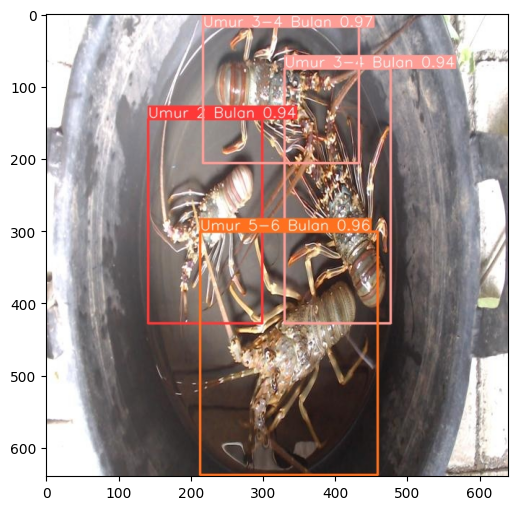

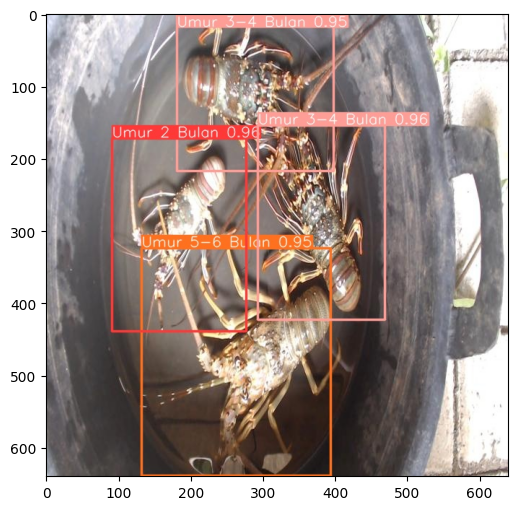

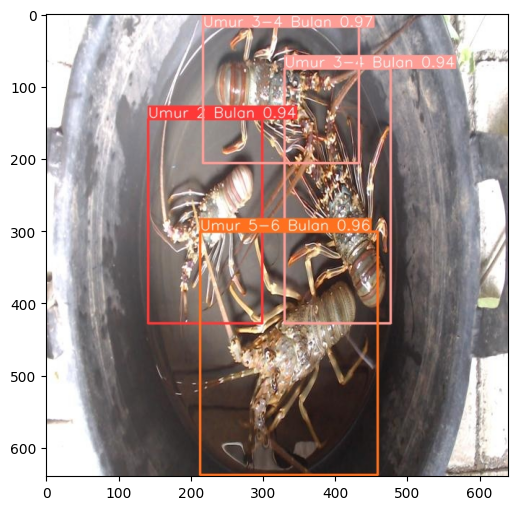

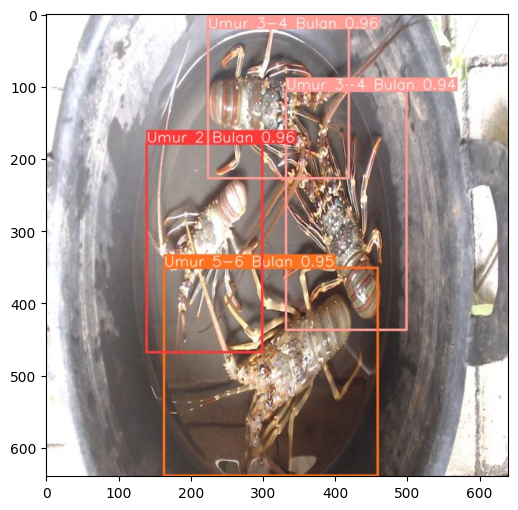

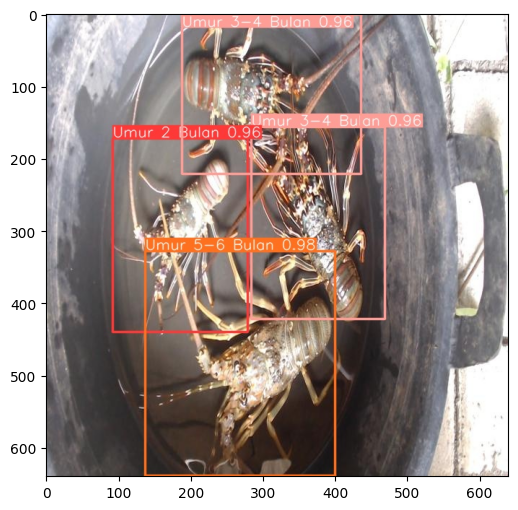

In [ ]:
for i in range(1, 11):
    pred_img = random.choice(predicted_images)
    plt.figure(figsize=(6, 6))
    image = mpimg.imread(f'{predict_path}/{pred_img}')
#     plt.subplot(len(plots), 1, idx+1)
    plt.imshow(image)

# START Lagi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!yolo predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/Training.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 97.0ms
video 1/1 (2/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 15.6ms
video 1/1 (3/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 15.5ms
video 1/1 (4/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 9.3ms
video 1/1 (5/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 2 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 15.4ms
video 1/1 (6/1854) /content/drive/MyDrive/Training.mp4: 384x640 1 Umur 2 Bulan, 3 Umur 3-4 Bulans, 1 Umur 5-6 Bulan, 12.2ms
video 1/1 (7/1854) /content/drive/MyDrive/Train